In [1]:
import pandas as pd

MUSIC = 'MusicData.csv'

df = pd.read_csv(filepath_or_buffer=MUSIC, thousands=',')
df = df.dropna()
df['Value (Actual)'] = df['Value (Actual)'].apply(func=lambda x: 0 if x < 0 else x)
df

,index,Format,Metric,Year,Number of Records,Value (Actual)
10,10,CD,Units,1983,1,0.800000
11,11,CD,Units,1984,1,5.800000
12,12,CD,Units,1985,1,22.600000
13,13,CD,Units,1986,1,53.000000
14,14,CD,Units,1987,1,102.100000
...,...,...,...,...,...,...
3003,3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


We only have annual data so our graph is going to look a little blocky. Also, the end of the Album Era was a real crisis for the industry.
Definitely, the total sales have settled into a new normal, with streaming replacing some of physical media sales.

In [2]:
from plotly.express import histogram
from plotly.colors import qualitative
histogram(data_frame=df[df['Metric'] == 'Units'], x='Year', y='Value (Actual)', color='Format',
          color_discrete_sequence=qualitative.Alphabet, height=600, nbins=df['Year'].nunique(), ).show()
histogram(data_frame=df[df['Metric'] != 'Units'], x='Year', y='Value (Actual)', color='Format', facet_row = 'Metric',
          color_discrete_sequence=qualitative.Alphabet, height=1200, nbins=df['Year'].nunique(), ).show()

In [3]:
# So, each plot will give you insight into a different aspect of the sales data: the first one focuses on the number of units sold,
# while the second one focuses on the adjusted value (which likely accounts for inflation or other adjustments)
# The problem we're facing is that we have nearly 30 formats and only about five have had consequential sales.

import plotly.express as px

# Define the metrics
metrics = ['Units', 'Value (Adjusted)']

# Generate scatter plots for each metric
for metric in metrics:
    fig = px.scatter(df[df['Metric'] == metric], x='Year', y='Format', size='Value (Actual)', color='Value (Actual)')
    fig.show()

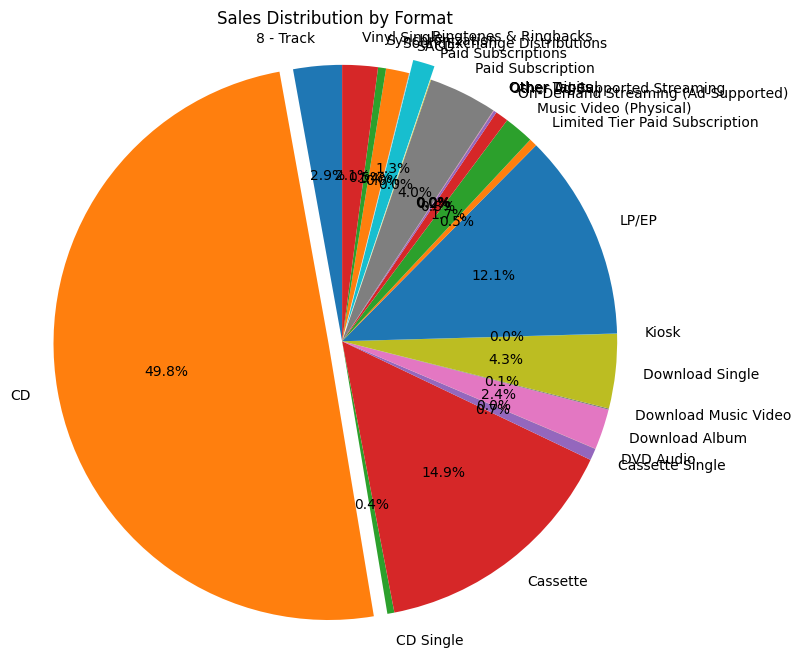

In [4]:
# Visualize percentage format impact over the years.

import matplotlib.pyplot as plt

# Group the data by format and calculate the total sales
sales_by_format = df.groupby('Format')['Value (Actual)'].sum()
explode = (0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0, 0, 0, 0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_format, labels=sales_by_format.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Sales Distribution by Format')
plt.axis('equal')
plt.show()

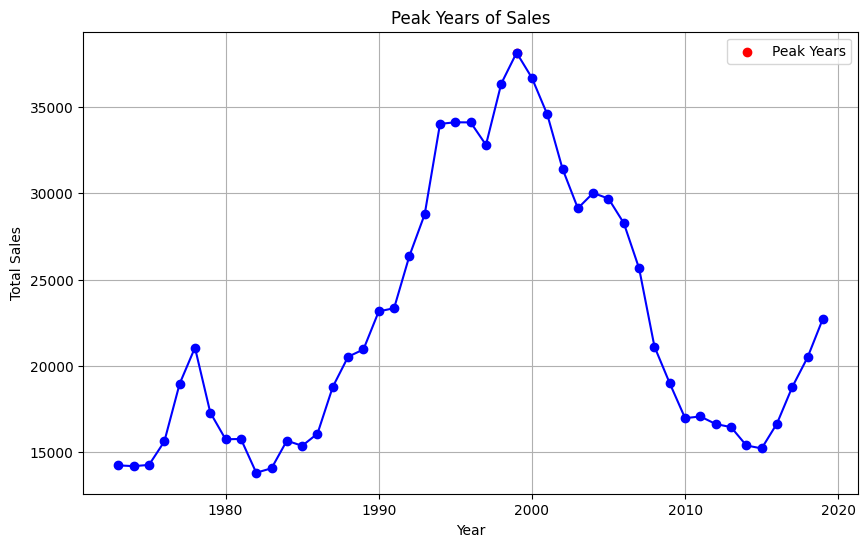

In [5]:
# Visualize peak years.

# Group the data by year and calculate the total sales
sales_by_year = df.groupby('Year')['Value (Actual)'].sum()

# Find the peak years
peak_years = sales_by_year[sales_by_year == sales_by_year.max()]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='b')
plt.scatter(peak_years.index, peak_years.values, color='r', label='Peak Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Peak Years of Sales')
plt.legend()
plt.grid(True)
plt.show()

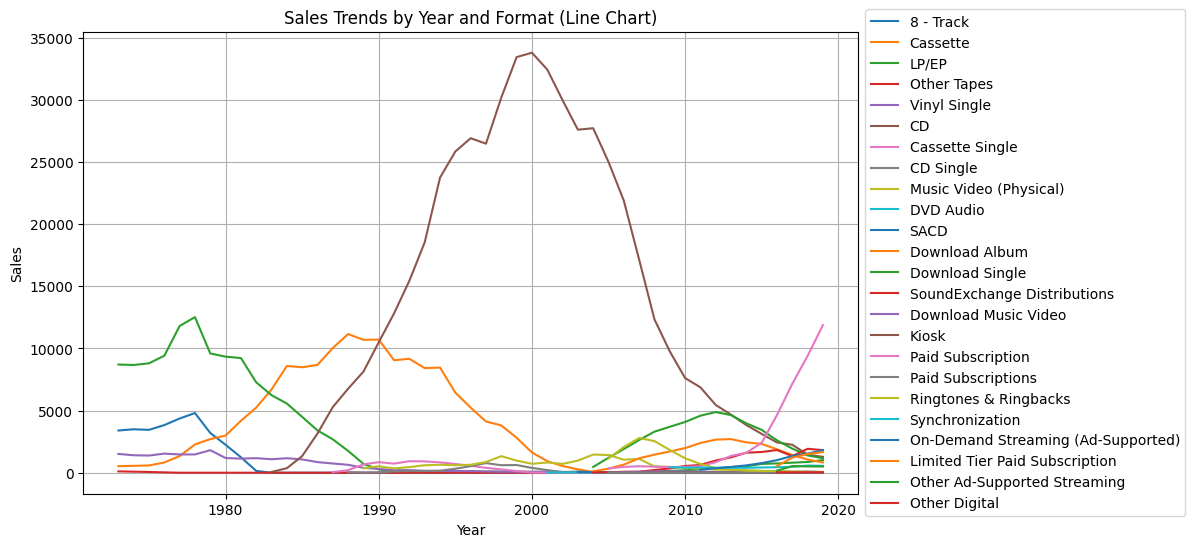

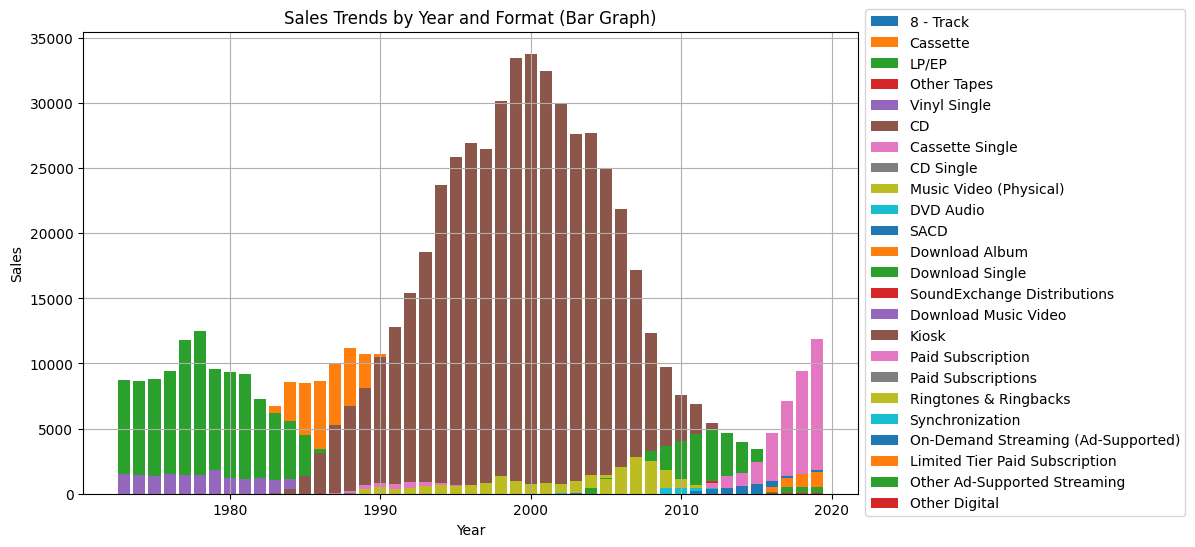

In [6]:
# Visualize sales trends over the years using line charts and bar graphs.

# Group the data by year and format and calculate the sum of sales
sales_by_year_format = df.groupby(['Year', 'Format'])['Value (Actual)'].sum().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
for format_type in sales_by_year_format['Format'].unique():
    format_data = sales_by_year_format[sales_by_year_format['Format'] == format_type]
    plt.plot(format_data['Year'], format_data['Value (Actual)'], label=format_type)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trends by Year and Format (Line Chart)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

# Bar graph
plt.figure(figsize=(10, 6))
for format_type in sales_by_year_format['Format'].unique():
    format_data = sales_by_year_format[sales_by_year_format['Format'] == format_type]
    plt.bar(format_data['Year'], format_data['Value (Actual)'], label=format_type)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trends by Year and Format (Bar Graph)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

Next is scatter plots for the specified metrics ('Units' and 'Value (Adjusted)'). Each plot displays the relationship between 'Year' and 'Value (Actual)' for each format (CD and CD Single), with the size of the points corresponding to the 'Value (Actual)'.

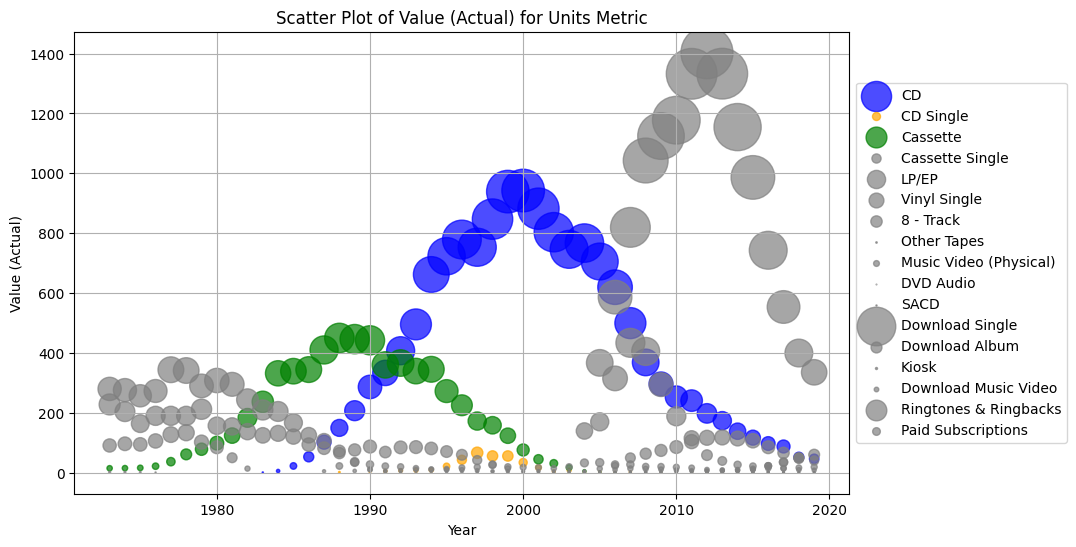

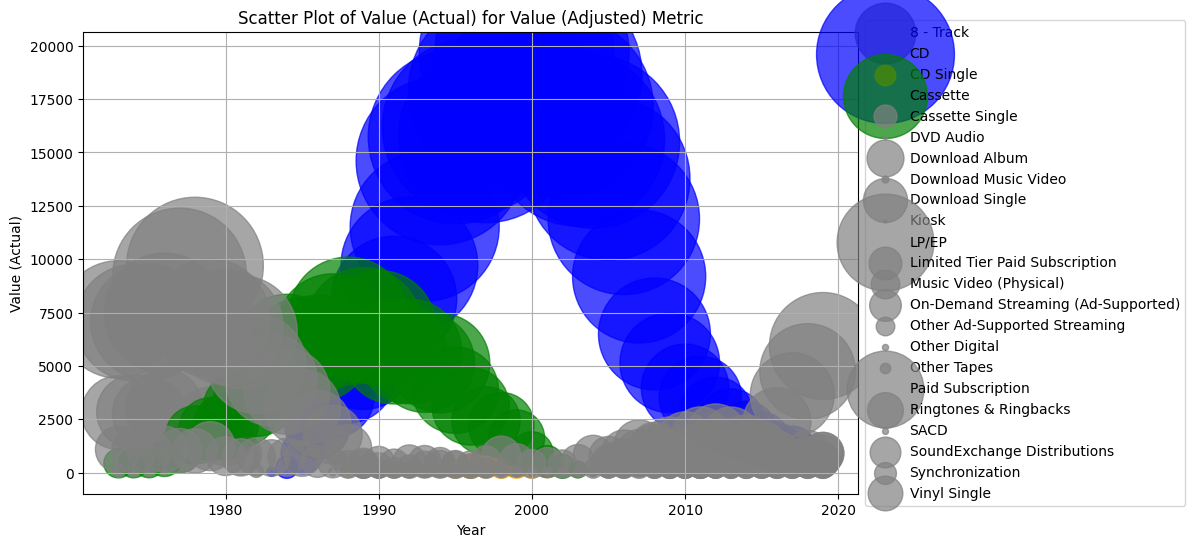

In [7]:
import matplotlib.pyplot as plt

# Define colors for different formats
colors = {'CD': 'blue', 'CD Single': 'orange', 'Cassette': 'green'}

# Iterate over the metrics
for metric in ['Units', 'Value (Adjusted)']:
    # Filter the DataFrame for the current metric
    metric_df = df[df['Metric'] == metric]

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    for format_type in metric_df['Format'].unique():
        format_data = metric_df[metric_df['Format'] == format_type]
        plt.scatter(format_data['Year'], format_data['Value (Actual)'],
                    s=format_data['Value (Actual)'], c=colors.get(format_type, 'gray'), alpha=0.7, label=format_type)

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Value (Actual)')
    plt.title(f'Scatter Plot of Value (Actual) for {metric} Metric')

    # Move the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.grid(True)
    plt.show()

Unfortunately, I did not find a wider database in which I could calculate everything related to market income, market shares, growth rates of one or another type of audio media. I would like to do an analysis of the customer demographics and the genre distribution according to those demographics. I would like to do it in future.